In [1]:
import pandas as pd

In [2]:
df =pd.read_csv("three.csv")

In [3]:
df

,num,name,label,review
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
df.head()

,num,name,label,review
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
df.shape

(74682, 4)

In [6]:
df['label'].value_counts()

Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: label, dtype: int64

In [7]:
df['num'].value_counts()

2049     6
7529     6
3179     6
9326     6
11375    6
        ..
597      6
6742     6
4695     6
10896    6
2047     6
Name: num, Length: 12447, dtype: int64

<AxesSubplot:>

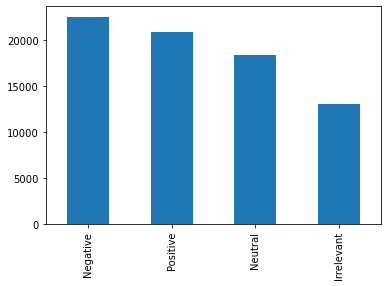

In [8]:
df['label'].value_counts().plot.bar()

In [9]:
df.isnull().sum()

num         0
name        0
label       0
review    686
dtype: int64

In [10]:
df = df.dropna()

In [11]:
df.shape

(73996, 4)

<AxesSubplot:>

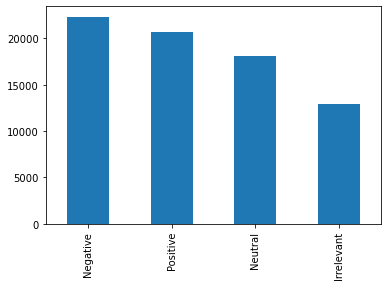

In [12]:
df['label'].value_counts().plot.bar()

In [13]:
df['label'].value_counts()

Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: label, dtype: int64

In [14]:
from nltk.stem.porter import PorterStemmer
por =PorterStemmer()

In [33]:
text ="I am studying , I played football students "

In [34]:
for w in text.split(' '):
    print(por.stem(w))

i
am
studi
,
i
play
footbal
student



In [35]:
[por.stem(w) for w in text.split(' ')]

['i', 'am', 'studi', ',', 'i', 'play', 'footbal', 'student', '']

In [36]:
'-'.join([por.stem(w) for w in text.split(' ')])

'i-am-studi-,-i-play-footbal-student-'

In [37]:
'  '.join([por.stem(w) for w in text.split(' ')])

'i  am  studi  ,  i  play  footbal  student  '

In [38]:
print(df['label'][500])

Neutral


In [21]:
print(df['review'][500])

GB, Love, and Tentacles is out now, and here are 5 reasons we're excited to


In [22]:
df['review'].apply(lambda x: '  '.join([por.stem(w) for w in x.split(' ')]))

0        im  get  on  borderland  and  i  will  murder ...
1        i  am  come  to  the  border  and  i  will  ki...
2        im  get  on  borderland  and  i  will  kill  y...
3        im  come  on  borderland  and  i  will  murder...
4        im  get  on  borderland  2  and  i  will  murd...
                               ...                        
74677    just  realiz  that  the  window  partit  of  m...
74678    just  realiz  that  my  mac  window  partit  i...
74679    just  realiz  the  window  partit  of  my  mac...
74680    just  realiz  between  the  window  partit  of...
74681    just  like  the  window  partit  of  my  mac  ...
Name: review, Length: 73996, dtype: object

In [23]:
print(df['review'][500])

GB, Love, and Tentacles is out now, and here are 5 reasons we're excited to


In [24]:
import string

In [25]:
punctuation=string.punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
table=str.maketrans('','',punctuation)
table

{33: None,
 34: None,
 35: None,
 36: None,
 37: None,
 38: None,
 39: None,
 40: None,
 41: None,
 42: None,
 43: None,
 44: None,
 45: None,
 46: None,
 47: None,
 58: None,
 59: None,
 60: None,
 61: None,
 62: None,
 63: None,
 64: None,
 91: None,
 92: None,
 93: None,
 94: None,
 95: None,
 96: None,
 123: None,
 124: None,
 125: None,
 126: None}

In [27]:
text ="helli ,how?. ahmad"
text.translate(table)

'helli how ahmad'

In [28]:
df['review'].apply(lambda x : x.translate(table))

0        im getting on borderlands and i will murder yo...
1        I am coming to the borders and I will kill you...
2        im getting on borderlands and i will kill you all
3        im coming on borderlands and i will murder you...
4        im getting on borderlands 2 and i will murder ...
                               ...                        
74677    Just realized that the Windows partition of my...
74678    Just realized that my Mac window partition is ...
74679    Just realized the windows partition of my Mac ...
74680    Just realized between the windows partition of...
74681    Just like the windows partition of my Mac is l...
Name: review, Length: 73996, dtype: object

In [29]:
from nltk.corpus import stopwords

In [32]:
stopwords.words("english")

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\User/nltk_data'
    - 'C:\\Users\\User\\anaconda3\\nltk_data'
    - 'C:\\Users\\User\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\User\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\User\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************
